In [1]:
from bs4 import *
from urllib.request import urlopen
import pandas as pd
import re
import requests
import json
import getpass
import multiprocessing
from multiprocessing import Pool
import math
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

In [2]:
path = "https://gist.github.com/paulmillr/2657075"

# Now we get html code from page
soup = BeautifulSoup(urlopen(path), 'html.parser')
    
# We extract values and labels for the ones that are in bold in the html code 
extracted_td = soup.findAll('td')
text = str(extracted_td)
soup_td = BeautifulSoup(text, 'html.parser')

extracted_contributors = soup_td.findAll('a', {"href": re.compile("https://github.com/*")})

In [3]:
contributors = []
for contributor in extracted_contributors:
        contributors.append(contributor.text)
contributors = contributors[:256]

In [24]:
global token 
token = input('Github Access token: ')

Github Access token: 67f3f047c6fd4e900d6c4e034ded28c504f586d8


In [25]:
# Fonction to get mean of stars for all the repositories owned of a github user:
def get_mean_stars(github_user):
    
    print('Counting stars for a new contributor')
    url_repositories = "https://api.github.com/users/" + github_user + "?access_token=" + token
    # Ajout d'un sleep pour éviter d'être bloqué par l'api du type:
    # You have triggered an abuse detection mechanism
    time.sleep(1)
    response_user_repositories = requests.get(url=url_repositories).json()#, auth = (username, password)).json()
    repositories_owned = response_user_repositories["public_repos"]
    
    number_of_pages = math.ceil(repositories_owned/100)
    response_user_stars = []
    stars = 0
    for i in range(1, number_of_pages + 1):
        url_stars = "https://api.github.com/users/" + github_user + "/repos?access_token=" + token +"&page=" +str(i)+"&per_page=100"
        #url_stars = "https://api.github.com/users/" + contributors[2] + "/repos?page=" + str(i) + "&per_page=100"
        response_user_stars += requests.get(url=url_stars).json()#, auth = (username, password)).json()
    for i in range(0, len(response_user_stars)):
        stars = stars + response_user_stars[i]["stargazers_count"]
    if(repositories_owned != 0):       
        mean_of_stars = stars/repositories_owned
    else:
        mean_of_stars = 0
    
    return mean_of_stars

In [26]:
#from functools import partial
#from itertools import product
# Pour augmenter la vitesse d'execution on peut augmenter le nombre de process.
# Cependant si on va trop vite l'api va nous bloquer.
with Pool(processes=4) as pool: #multiprocessing.cpu_count()
    list_of_means = pool.map(get_mean_stars, contributors)

Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
C

Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
Counting stars for a new contributor
C

In [61]:
df_contributors_stars = pd.DataFrame({"Contributors": contributors, "Mean_of_stars":list_of_means})
df_contributors_stars.head(20)

,Contributors,Mean_of_stars
0,GrahamCampbell,121.523810
1,fabpot,29.678571
2,weierophinney,3.723684
3,rkh,13.113514
4,josh,57.350877
5,SamyPesse,327.761905
6,rstacruz,88.464853
7,tmm1,43.382653
8,michalbe,5.622222
9,andrew,3.662602


In [62]:
# Vérification que les threads n'ont pas tout mélangé, on prend un user au hasard. Et on vérifie qu'on trouve les mêmes valeurs
r = random.randrange(0,256)
print(df_contributors_stars.loc[[r]])
print(contributors[r], get_mean_stars(contributors[r]))


       Contributors  Mean_of_stars
45  nicolasgramlich      56.410959
Counting stars for a new contributor
nicolasgramlich 56.41095890410959


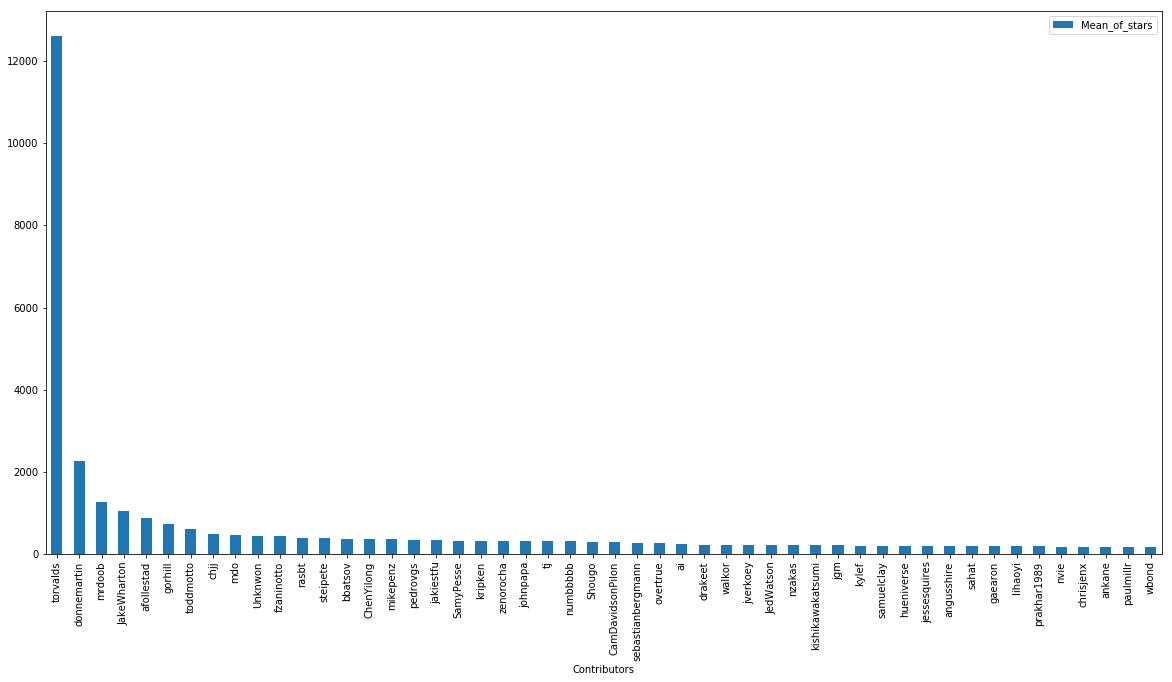

In [63]:
# Classement des users de la plus grande moyenne à la plus petite:
# Plot du top 50
result_ordered = df_contributors_stars.sort_values(ascending=False, by="Mean_of_stars")
result_ordered.head(50).plot(x='Contributors', y='Mean_of_stars',kind='bar',figsize=(20,10))
plt.show()

In [ ]:
# Version longue évite d'être bloqué par l'api pour trop de calls simultanés... mais plus long, ne pas executer
#mean_of_stars=[]
#for github_user in contributors:
#    mean_of_stars.append(get_mean_stars(github_user))
#mean_of_stars

In [53]:
#username = input('Github username: ')
#password = getpass.getpass('Github password: ')

Github username: ecaman
Github password: ········
